In [83]:
import pandas as pd
import matplotlib.pyplot as plt

renewables_df = pd.read_csv('renewable-share-energy.csv')
co2_df = pd.read_csv('consumption-co2-per-capita.csv')

In [66]:
# Countries that have data in 1990 and 2020 in both datasets
renewables_1990 = renewables_df[renewables_df['Year'] == 1990]['Entity']
co2_1990 = co2_df[co2_df['Year'] == 1990]['Entity']

renewables_2020 = renewables_df[renewables_df['Year'] == 2020]['Entity']
co2_2020 = co2_df[co2_df['Year'] == 2020]['Entity']

countries_1990 = set(renewables_1990).intersection(co2_1990)
countries_2020 = set(renewables_2020).intersection(co2_2020)

countries_both_years = countries_1990.intersection(countries_2020)

non_country_entities = [
    'High-income countries', 'South America', 'Europe', 'Oceania', 'Africa',
    'Lower-middle-income countries', 'Upper-middle-income countries', 'World',
    'North America', 'European Union (27)', 'Asia'
]

filtered_countries = set(countries_both_years) - set(non_country_entities)

sorted_filtered_countries = sorted(filtered_countries)

# print(sorted_filtered_countries)

In [67]:
# Filter datasets to only include the countries in 'sorted_filtered_countries'
filtered_renewables_df = renewables_df[renewables_df['Entity'].isin(sorted_filtered_countries)]
filtered_co2_df = co2_df[co2_df['Entity'].isin(sorted_filtered_countries)]

In [68]:
# Filter the 'renewables_df' for years 1990 to 2020
renewables_df_1990_2020 = filtered_renewables_df[(filtered_renewables_df['Year'] >= 1990) & (filtered_renewables_df['Year'] <= 2020)]
average_renewables_by_year = renewables_df_1990_2020.groupby('Year')['Renewables (% equivalent primary energy)'].mean().tolist()

# Filter the 'co2_df' for years 1990 to 2020
co2_df_1990_2020 = filtered_co2_df[(filtered_co2_df['Year'] >= 1990) & (filtered_co2_df['Year'] <= 2020)]
average_co2_by_year = co2_df_1990_2020.groupby('Year')['Per capita consumption-based CO₂ emissions'].mean().tolist()

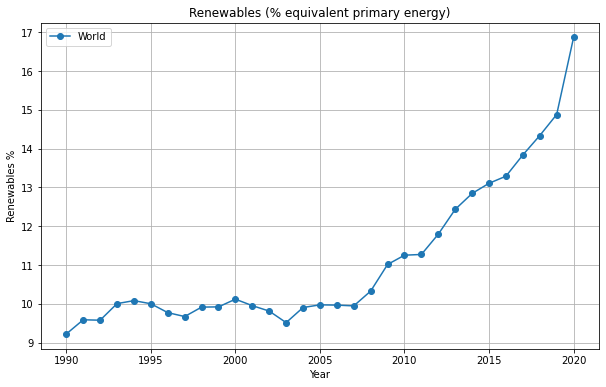

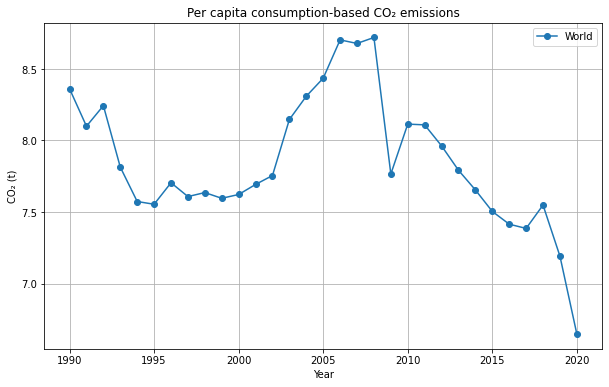

In [72]:
years = range(1990, 2021)

def plot_renewable(years, renewable_list, label):
    plt.figure(figsize=(10, 6))
    plt.plot(years, renewable_list, marker='o', label=label)
    plt.title('Renewables (% equivalent primary energy)')
    plt.xlabel('Year')
    plt.ylabel('Renewables %')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_co2(years, co2_list, label):
    plt.figure(figsize=(10, 6))
    plt.plot(years, co2_list, marker='o', label=label)
    plt.title('Per capita consumption-based CO₂ emissions')
    plt.xlabel('Year')
    plt.ylabel('CO₂ (t)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_renewable(years, average_renewables_by_year, 'World')
plot_co2(years, average_co2_by_year, 'World')

In [113]:
years = range(1990, 2021)

def plot_renewable_and_co2(years, renewable_list, co2_list, selection):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(years, renewable_list, marker='o', color='tab:blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Renewables (% equivalent primary energy)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.grid(True)
    
    ax2 = ax1.twinx()  
    ax2.plot(years, co2_list, marker='o', color='tab:green')
    ax2.set_ylabel('Per capita consumption-based CO₂ emissions (t)', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(f'Renewables and CO₂ Emissions Over Time ({selection})')

    plt.show()

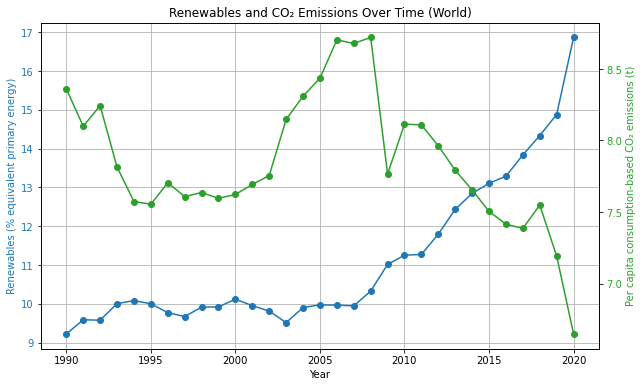

In [114]:
# Plot for world
plot_renewable_and_co2(years, average_renewables_by_year, average_co2_by_year, 'World')

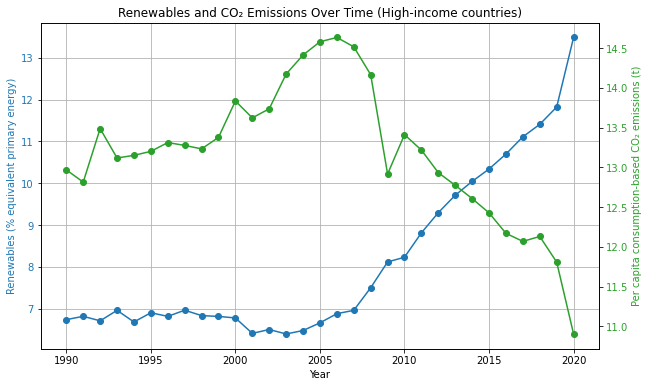

In [115]:
# Plot for high income countries
renewables_high_income = renewables_df[(renewables_df['Entity'] == 'High-income countries') & 
                            (renewables_df['Year'] >= 1990) & 
                            (renewables_df['Year'] <= 2020)]['Renewables (% equivalent primary energy)'].tolist()

co2_high_income = co2_df[(co2_df['Entity'] == 'High-income countries') & 
                            (co2_df['Year'] >= 1990) & 
                            (co2_df['Year'] <= 2020)]['Per capita consumption-based CO₂ emissions'].tolist()

plot_renewable_and_co2(years, renewables_high_income, co2_high_income, 'High-income countries')

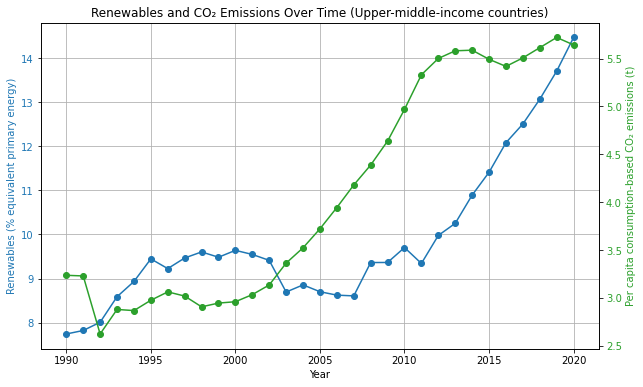

In [116]:
# Plot for upper middle income countries
renewables_upper_midle = renewables_df[(renewables_df['Entity'] == 'Upper-middle-income countries') & 
                            (renewables_df['Year'] >= 1990) & 
                            (renewables_df['Year'] <= 2020)]['Renewables (% equivalent primary energy)'].tolist()

co2_upper_midle = co2_df[(co2_df['Entity'] == 'Upper-middle-income countries') & 
                            (co2_df['Year'] >= 1990) & 
                            (co2_df['Year'] <= 2020)]['Per capita consumption-based CO₂ emissions'].tolist()

plot_renewable_and_co2(years, renewables_upper_midle, co2_upper_midle, 'Upper-middle-income countries')

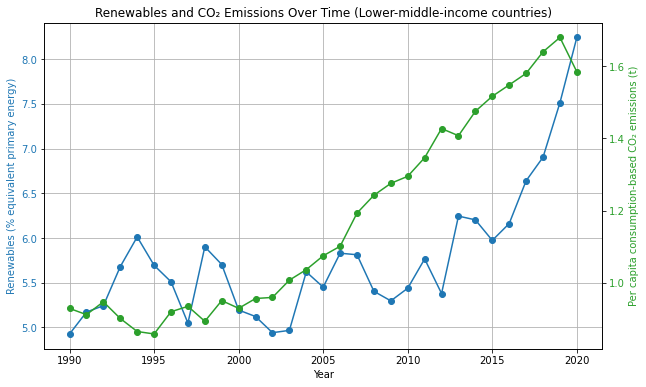

In [117]:
# Plot for lower middle income countries
renewables_lower_midle = renewables_df[(renewables_df['Entity'] == 'Lower-middle-income countries') & 
                            (renewables_df['Year'] >= 1990) & 
                            (renewables_df['Year'] <= 2020)]['Renewables (% equivalent primary energy)'].tolist()

co2_lower_midle = co2_df[(co2_df['Entity'] == 'Lower-middle-income countries') & 
                            (co2_df['Year'] >= 1990) & 
                            (co2_df['Year'] <= 2020)]['Per capita consumption-based CO₂ emissions'].tolist()

plot_renewable_and_co2(years, renewables_lower_midle, co2_lower_midle, 'Lower-middle-income countries')